<a href="https://colab.research.google.com/github/Shantnu-Poonia/E-commerce-Landing-page/blob/main/Copy_of_CS985_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from math import sqrt #to
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import LogisticRegression
from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import ValidationCurve

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.preprocessing import StandardScaler

In [49]:
df=pd.read_csv('CS98XRegressionTrain.csv')


In [50]:
test_df=pd.read_csv('/content/CS98XRegressionTest.csv')
test_ids = test_df['Id']

In [52]:
df.shape

(453, 15)

In [53]:
df.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


Looking for Obvious Trends


In [55]:
Benchmark = df[['artist','year','title', 'pop', 'acous']]
# The Benchmark is the "Popularity" index, as that is our label
Benchmark = Benchmark.sort_values(by=['pop', 'title'], ascending=[False, True])
Benchmark.artist = Benchmark.artist.str.strip('[]').str.replace("'", "")
Benchmark.head()

,artist,year,title,pop,acous
294,Queen,1975,Bohemian Rhapsody - 2011 Mix,84,27
263,TOTO,1982,Africa,83,26
234,Coldplay,2002,The Scientist,83,73
162,Queen,1980,Another One Bites The Dust - Remastered 2011,82,11
337,The Beatles,1969,Here Comes The Sun - Remastered 2009,82,3


In [56]:
Benchmark.tail()

,artist,year,title,pop,acous
72,Ike Carpenter Orchestra,2006,Pachuko Hop,28,59
252,Suzi Miller And Johnson Brothers,2012,Happy Days And Lonely Nights,27,43
265,Terry Dene,2015,Stairway Of Love,27,55
357,Rusty Draper,1953,Held for Questioning,26,79
330,Anthony Newley,2012,I've Waited So Long,26,64


In [57]:
year = Benchmark.sort_values(by=['year', 'pop'], ascending=[True, False])
year.head(10)

,artist,year,title,pop,acous
201,Doris Day,1948,Whatever Will Be Will Be (Que Sera Sera) (with...,62,86
357,Rusty Draper,1953,Held for Questioning,26,79
103,The Platters,1957,Only Because,44,85
107,Frank Sinatra,1958,Chicago - Remastered,47,61
344,Billy Eckstine,1958,Gigi,35,93
191,Neil Sedaka,1959,You Mean Everything to Me,48,52
448,Ella Fitzgerald,1959,But Not For Me,45,92
34,Elvis Presley,1961,Can't Help Falling in Love,78,94
280,The Marvelettes,1961,Please Mr. Postman,68,73
352,Bobby Vee,1961,Rubber Ball,47,69


In [58]:
# Perhaps this is biased, as the music from 1921 might actually be less popular. Let's use qualitative data to see if our hypothesis of new year = +popularity is true.
popularoldyear = df.loc[(df['year'] >= 1950) & (df['year'] <= 2000)]
popularoldyear = popularoldyear.sort_values(by=['pop', 'title'], ascending=[False, True])
popularoldyear.head(20)

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
294,295,Bohemian Rhapsody - 2011 Mix,Queen,glam rock,1975,71,40,41,-10,30,22,354,27,5,84
263,264,Africa,TOTO,album rock,1982,93,37,67,-18,5,73,296,26,3,83
162,163,Another One Bites The Dust - Remastered 2011,Queen,glam rock,1980,110,53,93,-6,16,75,215,11,16,82
337,338,Here Comes The Sun - Remastered 2009,The Beatles,british invasion,1969,129,54,56,-10,18,39,186,3,3,82
441,442,Break My Stride,Matthew Wilder,new wave pop,1983,110,59,92,-11,9,83,184,20,6,81
374,375,Rocket Man (I Think It's Going To Be A Long Lo...,Elton John,glam rock,1972,137,53,60,-9,9,34,282,43,3,81
94,95,Everybody Wants To Rule The World,Tears For Fears,dance rock,1985,112,80,65,-12,10,54,251,35,5,80
346,347,I Wanna Dance with Somebody (Who Loves Me),Whitney Houston,dance pop,1987,119,82,71,-9,9,87,291,21,5,80
230,231,Summer Of '69,Bryan Adams,album rock,1984,139,83,51,-6,7,77,216,2,4,80
331,332,The Real Slim Shady,Eminem,detroit hip hop,2000,105,66,95,-4,5,76,284,3,6,80


<ipython-input-59-123234b435b9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='icefire');


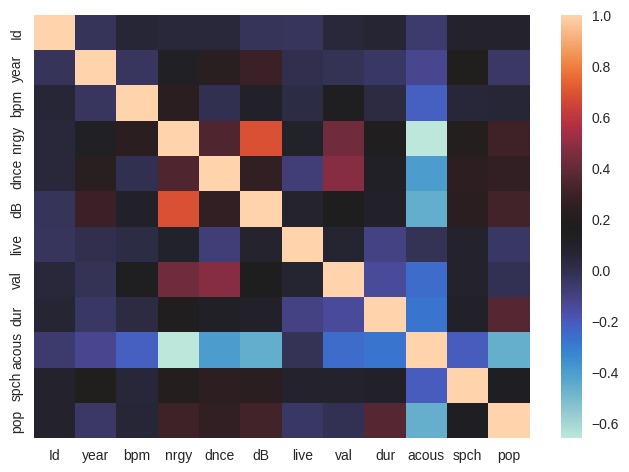

In [59]:
sns.heatmap(df.corr(), cmap='icefire');

In [60]:
df.corr()['pop'].sort_values(ascending=False) # Numerical values to prove hypotheses

<ipython-input-60-e35b522a6f45>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['pop'].sort_values(ascending=False) # Numerical values to prove hypotheses


pop      1.000000
dur      0.363266
dB       0.316854
nrgy     0.303797
dnce     0.258670
spch     0.130955
Id       0.086837
bpm      0.055024
val     -0.018713
live    -0.051364
year    -0.054293
acous   -0.465875
Name: pop, dtype: float64

<ipython-input-61-179bac2ff66d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['live'], ax=axs[0], kde=False)


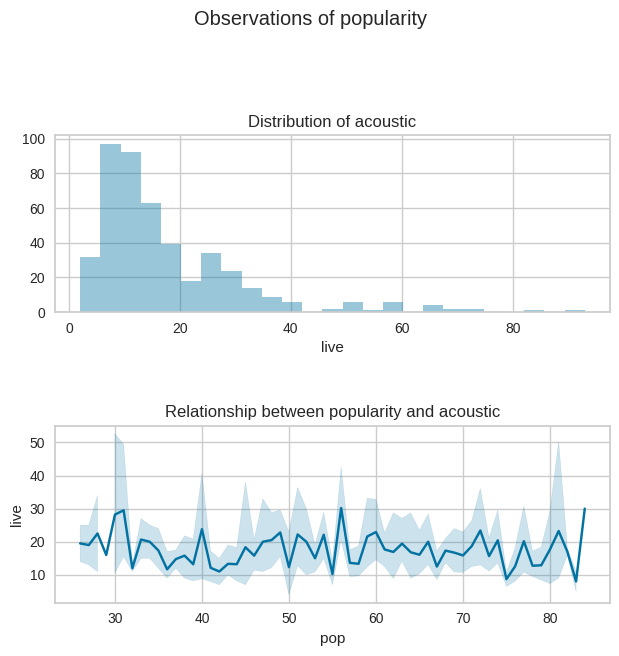

In [61]:
Z = df.live

fig,axs = plt.subplots(2,1, figsize=(7,7))
fig.suptitle('Observations of popularity')

# Observe the distribution of 'popularity'axs[0].set_title('Distribution of popularity')
axs[0].set_title('Distribution of acoustic')
sns.distplot(df['live'], ax=axs[0], kde=False)

axs[1].set_title('Relationship between popularity and acoustic')
sns.lineplot(x='pop', y='live', data=df, ax=axs[1])

fig.tight_layout(pad=3.0)

In [62]:
test_df = test_df.copy()
test_df = test_df.drop(['title','artist','top genre', 'spch', 'Id', 'bpm', 'val'], axis=1)

In [63]:
scaler = StandardScaler()
scaler.fit(test_df)
test_df = pd.DataFrame(scaler.transform(test_df), index= test_df.index, columns=test_df.columns)

In [64]:
def preprocess_inputs(df):
  df = df.copy()
  df = df.drop(['title','artist','top genre', 'spch', 'Id', 'bpm', 'val'], axis=1)

  y = df['pop']
  X = df.drop('pop', axis=1)

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)


  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
  X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)


  return X_train, X_test, y_train, y_test


In [65]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [66]:
X_train.mean()

year     1.434534e-15
nrgy     7.004562e-17
dnce    -8.965839e-17
dB      -5.603649e-17
live    -1.120730e-17
dur     -5.043284e-17
acous   -5.043284e-17
dtype: float64

Training

In [67]:
def print_output(model, test_df):
  test_predictions = model.predict(test_df)

  test = pd.Series(test_predictions)
  test
  output_df = pd.concat([test_ids, test], axis=1)
  output_df.columns = ['Id', 'pop']

  output_df.to_csv("output.csv",index=False)


In [68]:
dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(X_train, y_train)
val_preds1 = dec_tree.predict(X_test)
val_mae2 = mean_absolute_error(y_test, val_preds1)
print(f'Mean absolute error of this model: {val_mae2:.3f}')
print_output(dec_tree, test_df)


Mean absolute error of this model: 11.618


In [69]:
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)
val_preds1 = rf_model.predict(X_test)
val_mae3 = mean_absolute_error(y_test, val_preds1)
print(f'Mean absolute error of this model: {val_mae3:.3f}')
print_output(rf_model, test_df)

Mean absolute error of this model: 8.617


In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

val_preds1 = model.predict(X_test)
val_mae1 = mean_absolute_error(y_test, val_preds1)

print(f'Mean absolute error of this model: {val_mae1:.3f}')

Mean absolute error of this model: 9.369
